In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set global font to Times New Roman for all plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

# 📊 Lab 5: Visualizing Principal Component Analysis (PCA) – Wine Dataset

## 🧾 Dataset Introduction

For this lab, we utilize the **Wine dataset** from the `scikit-learn` library.

It contains 178 samples of three different wine cultivars grown in the same region in Italy.  
Each wine is described using 13 continuous chemical properties (e.g., alcohol, flavanoids, ash).

PCA is particularly useful for this dataset because it enables the reduction of 13 dimensions down to 2 or 3 for visualization, while retaining most of the original variability in the data.  
The dataset is balanced and contains numerical features only.

### Why PCA for the Wine Dataset?

- **High Dimensionality:** With 13 features, visualizing and understanding relationships is challenging. PCA projects the data into fewer dimensions that capture the most variance.
- **Class Structure:** The dataset contains three wine classes. PCA helps reveal whether these classes are separable in lower-dimensional space.
- **Feature Redundancy:** Some chemical properties are correlated. PCA identifies and combines these into principal components, reducing redundancy.
- **Interpretability:** By examining the principal components and their loadings (see the Eigenvectors table), we can understand which original features contribute most to the main axes of variation in the data.

### What You Will Learn

- How to standardize data for PCA.
- How to compute and interpret the covariance matrix.
- How to extract and visualize eigenvalues and eigenvectors.
- How to decide how many principal components to keep.
- How to visualize high-dimensional data in 2D using PCA, and interpret the results in the context of the wine dataset.


In [43]:
# Import necessary modules for PCA workflow
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and prepare the dataset
wine = load_wine()

# Convert to DataFrame for easier handling
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Assign the target labels from the dataset
target = wine.target

# Display the first 5 rows of the dataframe
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Before applying PCA, the data is standardized using **StandardScaler**. 

This step ensures that all features have zero mean and unit variance, preventing any single feature from dominating due to its scale.

In [44]:
# Standardize the features to zero mean and unit variance
scaler = StandardScaler() # Initialize the scaler
X_scaled = scaler.fit_transform(df) # Standardize the features

# Convert the scaled features back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# Display the scaled data
print("Standardized Features:")
print(X_scaled_df.head(5))

Standardized Features:
         0         1         2         3         4         5         6   \
0  1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1  0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2  0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3  1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4  0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   

         7         8         9         10        11        12  
0 -0.659563  1.224884  0.251717  0.362177  1.847920  1.013009  
1 -0.820719 -0.544721 -0.293321  0.406051  1.113449  0.965242  
2 -0.498407  2.135968  0.269020  0.318304  0.788587  1.395148  
3 -0.981875  1.032155  1.186068 -0.427544  1.184071  2.334574  
4  0.226796  0.401404 -0.319276  0.362177  0.449601 -0.037874  


## Compute Covarience Matrix

In [45]:
cov_matrix = np.cov(X_scaled.T)  # Transpose to get features as rows
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0

## 🔥 Covariance Matrix Heatmap

**What does this image show?**  
- The heatmap displays the pairwise covariances between all 13 wine features.  
- The diagonal cells (all value ≈ 1.01) show the variance of each standardized feature.
- Off-diagonal cells reveal how two features vary together: red for strong positive covariance, blue for strong negative covariance, and white for near-zero (uncorrelated).

**What is its highlight?**  
- *Total phenols* and *flavanoids* have a strong positive covariance (0.87), indicating they increase together in the wine samples.
- *Color intensity* and *hue* show a strong negative covariance (-0.52), meaning as color intensity increases, hue tends to decrease.
- Features like *magnesium* and *alcalinity_of_ash* have near-zero covariance (-0.08), suggesting little to no linear relationship.
- The heatmap reveals clusters of correlated features, such as the block of phenol-related variables, highlighting redundancy and the potential for dimensionality reduction.

**What can people learn?**  
- Highly correlated features (e.g., *total phenols* and *flavanoids*) are redundant and can be combined or reduced using PCA.
- Features with strong negative covariance (e.g., *color intensity* vs. *hue*) may represent opposing trends in the data.
- Uncorrelated features provide unique information.
- This visualization justifies the use of PCA: it helps identify which features can be compressed into principal components without significant information loss.


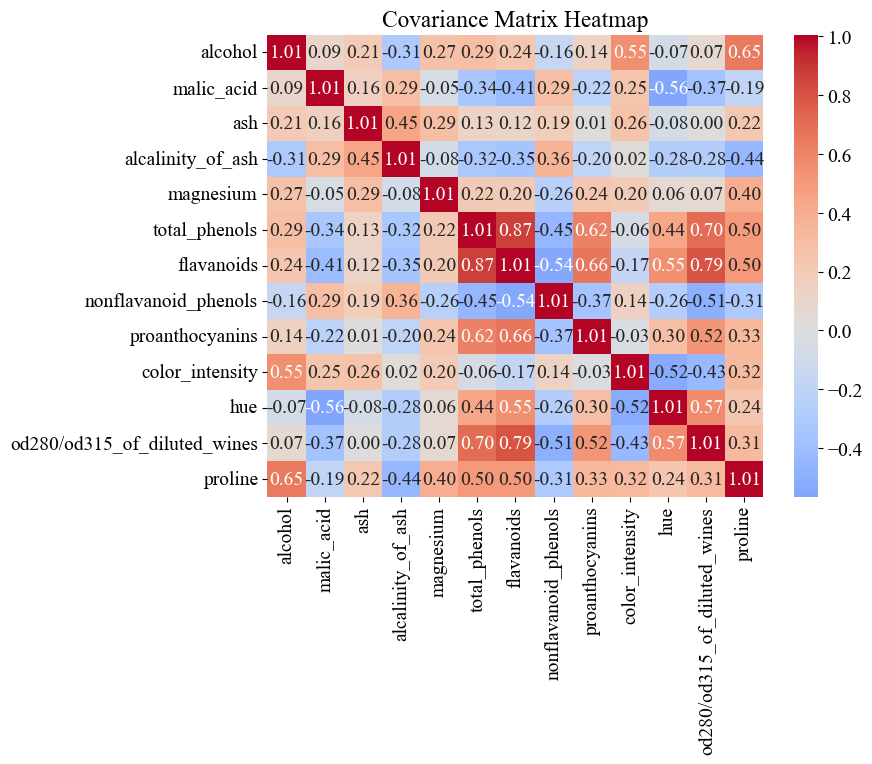

In [46]:
# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, 
            xticklabels=wine.feature_names,
            yticklabels=wine.feature_names, 
            cmap='coolwarm', 
            center=0, 
            annot=True, 
            fmt=".2f"
        )

plt.title("Covariance Matrix Heatmap")
#plt.savefig("Lab5_DanielTongu_CovarianceHeatmap.png")
plt.show()

## Eigenvalues of Principal Components


In [47]:
# Compute eigenvalues and eigenvectors of the covariance matrix
# These describe the directions (eigenvectors) and magnitude (eigenvalues) of variance
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
Eigenvectors = pd.DataFrame(
    eigenvectors,
    index=wine.feature_names,
    columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])]
)
print(Eigenvectors)

Eigenvalues:
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]

Eigenvectors:
                                   PC1       PC2       PC3       PC4  \
alcohol                      -0.144329 -0.483652 -0.207383  0.017856   
malic_acid                    0.245188 -0.224931  0.089013 -0.536890   
ash                           0.002051 -0.316069  0.626224  0.214176   
alcalinity_of_ash             0.239320  0.010591  0.612080 -0.060859   
magnesium                    -0.141992 -0.299634  0.130757  0.351797   
total_phenols                -0.394661 -0.065040  0.146179 -0.198068   
flavanoids                   -0.422934  0.003360  0.150682 -0.152295   
nonflavanoid_phenols          0.298533 -0.028779  0.170368  0.203301   
proanthocyanins              -0.313429 -0.039302  0.149454 -0.399057   
color_intensity               0.088617 -0.529996 -0.137306 -0.065926   
hue                          -0.2

----------------------------------------------

### 📉 Plot Eigenvalues of Principal Components

**What does this image show?**  
- The bar chart displays the eigenvalues for each principal component (PC) derived from the covariance matrix of the standardized wine dataset.
- Each bar's height corresponds to the amount of variance captured by that PC. For this dataset, PC1 has the highest eigenvalue (~4.73), followed by PC2 (~2.51), and so on.

**What is its highlight?**  
- The first principal component (PC1) alone explains a substantial portion of the total variance, with PC2 also contributing significantly.
- Specifically, PC1 and PC2 together account for over half of the total variance in the dataset.
- After PC5, the eigenvalues drop below 1, indicating that each subsequent component explains less variance than any single original feature.
- The last few PCs (PC10–PC13) contribute very little additional information, as seen by their small bars.

**What can people learn?**  
- This plot helps determine how many principal components to retain for effective dimensionality reduction.
- In this case, keeping the first 3–5 PCs would preserve most of the dataset's information, while reducing noise and complexity.
- The sharp decline in eigenvalues after the first few PCs visually justifies focusing on those components for further analysis or visualization.

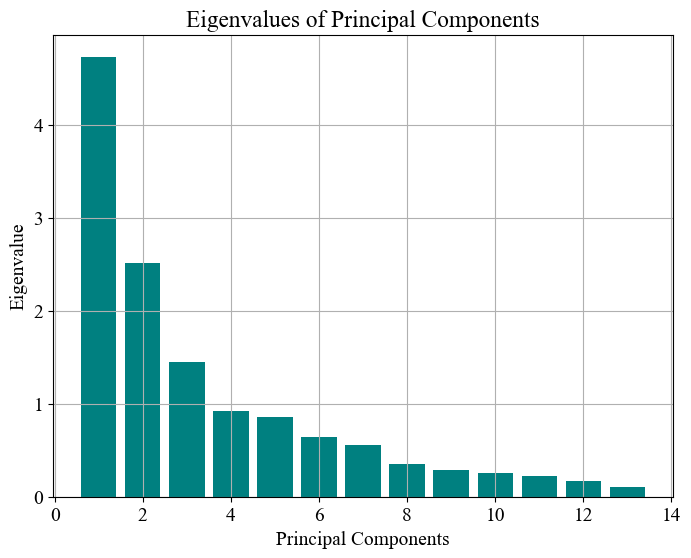

In [48]:
# Plot eigenvalues in a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues)+1), eigenvalues, color='teal')
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of Principal Components")
plt.grid(True)
#plt.savefig("Lab5_DanielTongu_EigenvaluesBarChart.png")
plt.show()

## 📈 Scree Plot – Cumulative Variance Explained

**What does this image show?**  
- The scree plot displays the cumulative proportion of variance explained as more principal components are added.
- The x-axis shows the number of principal components (from 1 to 13), and the y-axis shows the cumulative variance explained (from 0 to 1).

**What is its highlight?**  
- The first principal component explains about 36% of the total variance.
- The first 2 components together explain about 55% of the variance.
- The first 3 components capture roughly 67% of the variance, and the first 5 components together explain over 80%.
- By the time 7 components are included, more than 89% of the variance is explained.
- The curve flattens after the first few components, indicating diminishing returns for adding more components.

**What can people learn?**  
- Most of the dataset’s structure can be captured with just the first 3–5 principal components, making dimensionality reduction highly effective.
- Practitioners can confidently reduce the dataset to 3 or 5 dimensions with minimal information loss, simplifying analysis and visualization while retaining the essential patterns in the data.

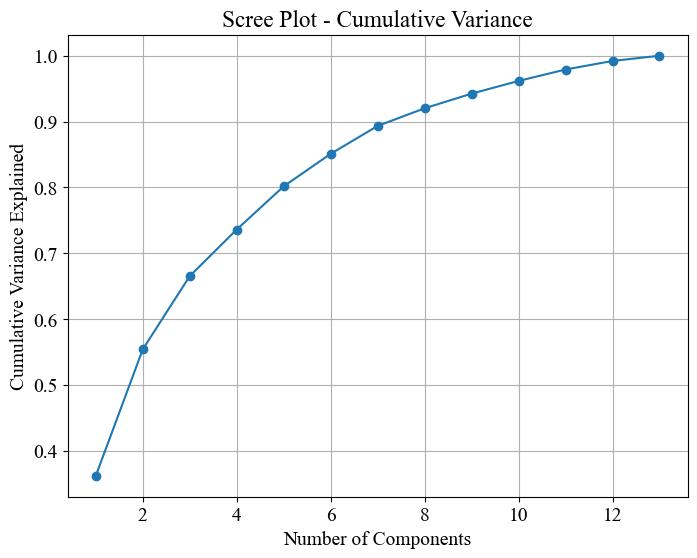

In [49]:
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Scree Plot - Cumulative Variance")
plt.grid(True)
#plt.savefig("Lab5_DanielTongu_ScreePlot.png")
plt.show()

## 🌐 PCA 2D Scatterplot

**What does this image show?**  
- This scatterplot projects each wine sample onto the first two principal components (PC1 and PC2), with points colored by wine class (target).
- The x-axis (PC1) and y-axis (PC2) together capture about **55% of the total variance** in the dataset.
- Each cluster corresponds to a different wine class, revealing how PCA separates the classes in reduced dimensions.

**What is its highlight?**  
- **Class 0** wines (red) form a distinct, tight cluster on the right side of the plot, clearly separated from the other classes.
- **Classes 1 and 2** (green and blue) overlap more, but still show visible structure and partial separation.
- The plot demonstrates that even with just two principal components, much of the class structure is preserved:  
    - PC1 is especially effective at separating class 0 from the others.
    - PC2 adds further separation, especially between classes 1 and 2.

**What can people learn?**  
- **PCA can reduce 13-dimensional data to 2D while retaining key differences between categories.**
- The clear separation of class 0 shows that PCA is effective for visualizing and exploring class structure in high-dimensional datasets.
- Overlap between classes 1 and 2 suggests some similarities, but the overall structure is still informative for exploratory analysis and potential classification tasks.


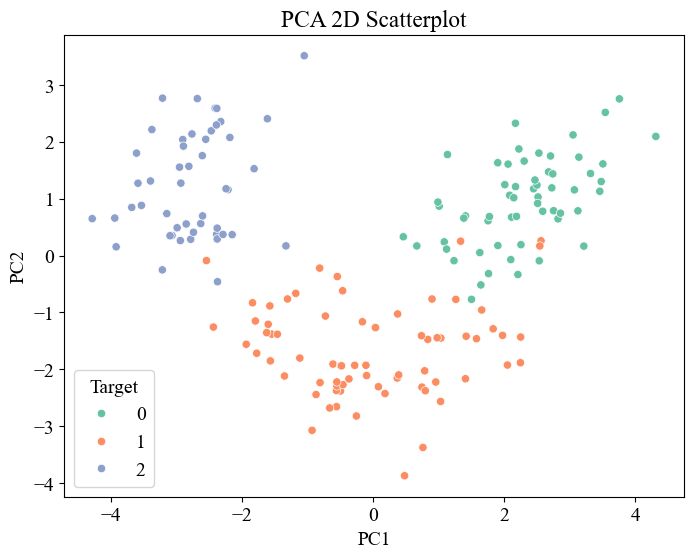

In [50]:
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=target, palette='Set2')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Scatterplot")
plt.legend(title="Target")
#plt.savefig("Lab5_DanielTongu_PCA2DScatterplot.png")
plt.show()

## 🧭 PCA Biplot – Feature Vector Overlay

**What does this image show?**  
- The biplot overlays the PCA-transformed wine samples (as points) with red arrows representing the original features’ directions and contributions to the first two principal components (PC1 and PC2).
- Each arrow’s direction and length indicate how strongly and in which direction a feature influences the principal components.

**What is its highlight?**  
- Features like **proline** and **color intensity** have long arrows pointing along the PC1 axis, showing they contribute heavily to PC1 and help separate wines along this dimension.
- **Flavanoids** and **od280/od315_of_diluted_wines** have arrows with strong components in both PC1 and PC2, indicating they influence both axes.
- The plot visually confirms that **class 0** wines are separated from others mainly along PC1, driven by high values of proline and color intensity.

**What can people learn?**  
- Biplots allow you to interpret what each principal component represents in terms of the original features.
- You can see which features are most important for distinguishing between wine classes:  
    - For example, wines with high proline and color intensity are pushed to the right in the plot (high PC1).
    - Features with arrows pointing in similar directions are positively correlated.
- This helps in understanding the underlying structure of the data and guides feature selection or further analysis.

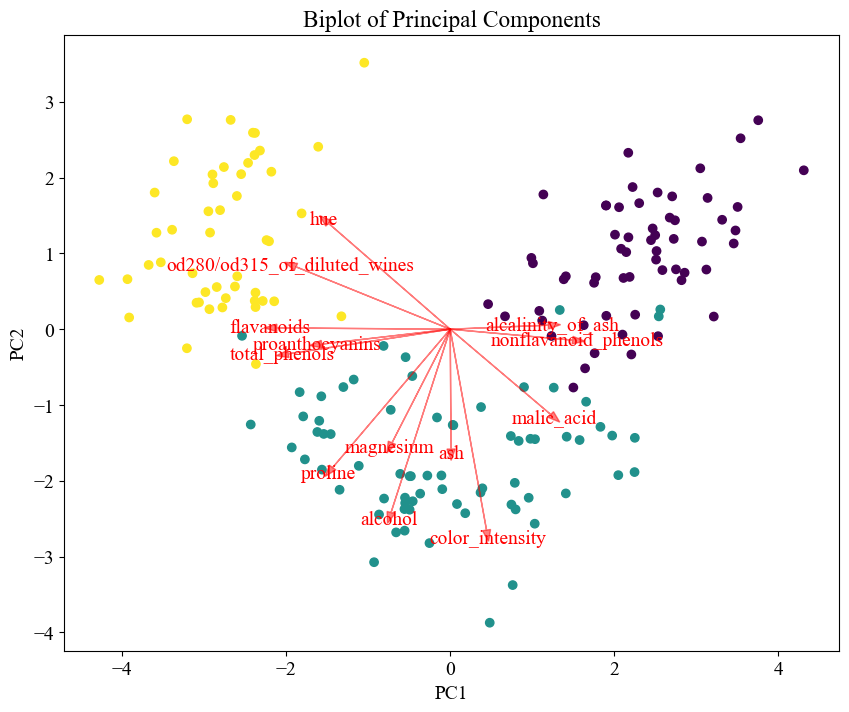

In [51]:

fig, ax = plt.subplots(figsize=(10, 8))
# Scatter plot of the PCA scores
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis')

# Plot arrows for feature loadings, scaled for visibility
for i in range(len(wine.feature_names)):
    ax.arrow(0, 0, eigenvectors[i, 0]*5, eigenvectors[i, 1]*5, color='r', alpha=0.5, head_width=0.1)
    ax.text(eigenvectors[i, 0] * 5.2, eigenvectors[i, 1] * 5.2, wine.feature_names[i], color='r', ha='center', va='center')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Biplot of Principal Components")
#plt.savefig("Lab5_DanielTongu_Biplot.png")
plt.show()

## ✅ Conclusion

Through this exercise, we explored the full PCA pipeline:
- Data standardization
- Covariance matrix computation and interpretation
- Eigen decomposition of features (see the `Eigenvectors` DataFrame for feature loadings)
- Principal component selection via variance (using eigenvalues and cumulative variance)
- Visualizations: heatmap, eigenvalue bar chart, scree plot, 2D scatterplot, and biplot

**Main takeaway:**  
- PCA reveals patterns in high-dimensional data and allows for meaningful, interpretable projections in 2D or 3D with minimal information loss.  
- This is critical for exploratory data analysis and machine learning, as it simplifies complex datasets while retaining essential structure.
